In [1]:
import sys

print("Python version:")
print(sys.version)


Python version:
3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]


# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow==2.10.0 opencv-python matplotlib

In [2]:
import sys
print(sys.executable)


C:\Users\ASUS\.conda\envs\python37\python.exe


In [4]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.0.0
anyio                        3.5.0
argon2-cffi                  20.1.0
astunparse                   1.6.3
attrs                        22.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       4.1.0
brotlipy                     0.7.0
cachetools                   5.3.1
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           2.0.4
colorama                     0.4.6
cryptography                 39.0.1
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
fastjsonschema               2.16.2
flatbuffers                  23.5.26
flit_core                    3.6.0
fonttools                    4.38.0
gast                         0.4.0

In [164]:
import tensorflow as tf
import os

In [165]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [166]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [6]:
!pip install opencv-python

In [167]:
import cv2
import imghdr  #allow us to check file extention of particular image

In [168]:
dt_dir = 'data' #dt_dir is the variable that hold the path to our data directory

In [169]:
os.listdir(dt_dir) #this should show the folders inside our data directory

['happy', 'sad']

In [170]:
image_extensions = ['jpeg','jpg', 'bmp', 'png']

In [171]:
for image_class in os.listdir(dt_dir): #goes inside our data directory
    for image in os.listdir(os.path.join(dt_dir, image_class)): #find every single image inside that directory
        image_path = os.path.join(dt_dir, image_class, image) #grabing every single image
        try: 
            img = cv2.imread(image_path) #openup an image & get that as a numpy array
            tip = imghdr.what(image_path)
            if tip not in image_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [172]:
import numpy as np
from matplotlib import pyplot as plt


In [173]:
data = tf.keras.utils.image_dataset_from_directory('data') #this build immage dataset automatically & also do some preprocessing like resizing images

Found 170 files belonging to 2 classes.


In [174]:
data_iterator = data.as_numpy_iterator() # will help to excess the generator (which is in the previous cell) from the pipeline

In [175]:
batch = data_iterator.next() #get batch of data from the iterator

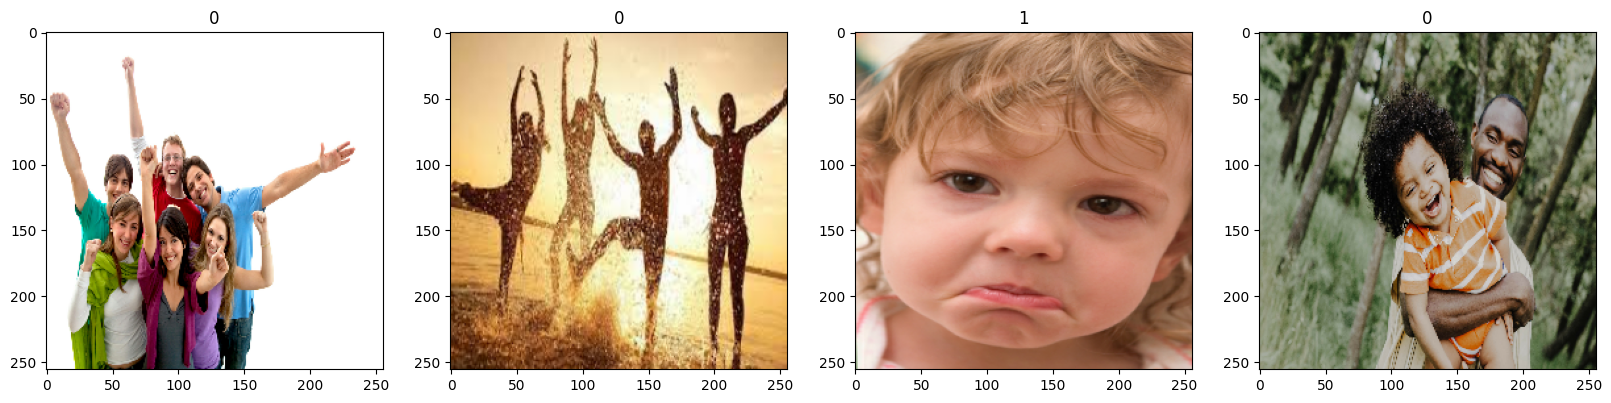

In [176]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))      #VISUALIZE THE LABEL OF THE DATA
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [177]:
data = data.map(lambda x,y: (x/255, y)) #map allows us to do various transformations of our data in pipeline, lambda funtcion do that transformation 
# x is independent variable & y is the dependent one

In [178]:
data.as_numpy_iterator().next()

(array([[[[0.06666667, 0.07450981, 0.07058824],
          [0.06666667, 0.07450981, 0.07058824],
          [0.06744792, 0.06744792, 0.06744792],
          ...,
          [0.05882353, 0.05490196, 0.04705882],
          [0.06478248, 0.06086091, 0.05301777],
          [0.06996017, 0.0660386 , 0.05160845]],
 
         [[0.06666667, 0.07450981, 0.07058824],
          [0.06666667, 0.07450981, 0.07058824],
          [0.06744792, 0.06744792, 0.06744792],
          ...,
          [0.05882353, 0.05490196, 0.04705882],
          [0.06478248, 0.06086091, 0.05301777],
          [0.06996017, 0.0660386 , 0.05160845]],
 
         [[0.06666667, 0.07450981, 0.07058824],
          [0.06666667, 0.07450981, 0.07058824],
          [0.06744792, 0.06744792, 0.06744792],
          ...,
          [0.05882353, 0.05490196, 0.04705882],
          [0.06478248, 0.06086091, 0.05301777],
          [0.06996017, 0.0660386 , 0.05160845]],
 
         ...,
 
         [[0.05490196, 0.05490196, 0.05490196],
          [0.05490

# 5. Split Data

In [179]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [180]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [181]:
from tensorflow.keras.models import Sequential #useful for one data input-output & the model flows from top to bottom
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [182]:
model = Sequential()

In [183]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [184]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [185]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [186]:
logdir='logs'

In [187]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [188]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 921ms/step - loss: 1.3741 - accuracy: 0.4766 - val_loss: 0.6029 - val_accuracy: 0.6429
Epoch 2/20
4/4 [==============================] - 4s 872ms/step - loss: 0.6358 - accuracy: 0.6250 - val_loss: 0.5916 - val_accuracy: 0.5476
Epoch 3/20
4/4 [==============================] - 3s 547ms/step - loss: 0.5443 - accuracy: 0.6875 - val_loss: 0.6005 - val_accuracy: 0.6429
Epoch 4/20
4/4 [==============================] - 3s 522ms/step - loss: 0.5720 - accuracy: 0.7109 - val_loss: 0.5106 - val_accuracy: 0.9286
Epoch 5/20
4/4 [==============================] - 3s 574ms/step - loss: 0.5102 - accuracy: 0.7891 - val_loss: 0.4977 - val_accuracy: 0.6429
Epoch 6/20
4/4 [==============================] - 3s 574ms/step - loss: 0.4549 - accuracy: 0.8281 - val_loss: 0.4090 - val_accuracy: 0.9048
Epoch 7/20
4/4 [==============================] - 3s 497ms/step - loss: 0.3687 - accuracy: 0.8906 - val_loss: 0.3313 - val_accuracy: 0.8095
Epoch 8/20
4/4 [====

# 8. Plot Performance

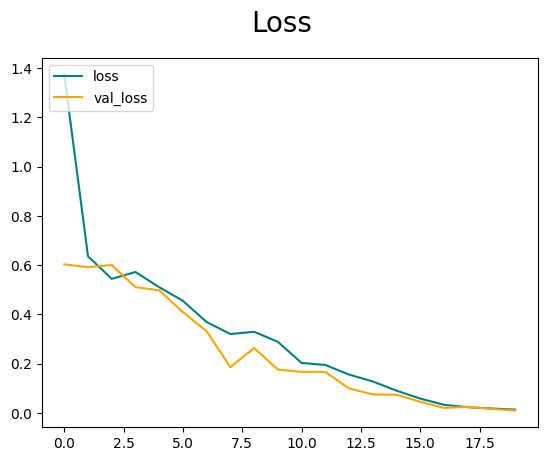

In [189]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

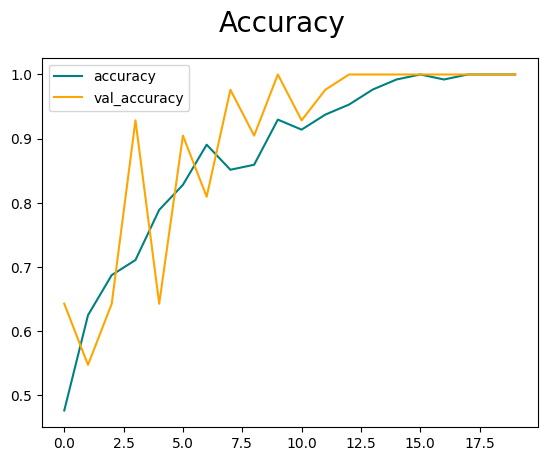

In [190]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [227]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [228]:
pre = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [229]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    bin_acc.update_state(y, yhat)

In [ ]:
print(pre.result() ,rec.result(),bin_acc.result())

# 10. Test

In [149]:
import cv2

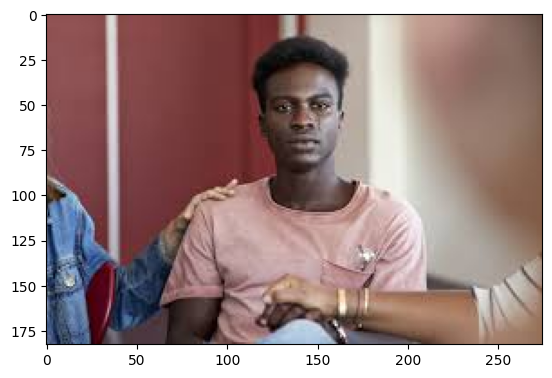

In [209]:
img = cv2.imread('sad_boi.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

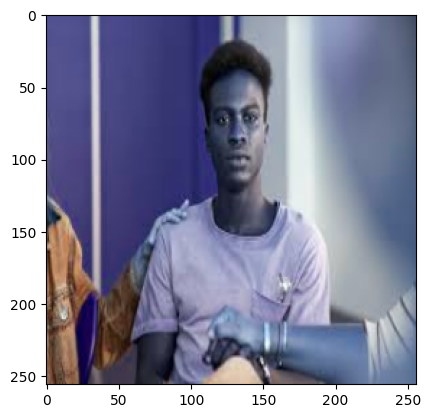

In [210]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [211]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [212]:
yhat

array([[0.604615]], dtype=float32)

In [213]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifiernewversion.h5'))

In [46]:
new_model = load_model(os.path.join('models','imageclassifiernewversion.h5'))

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


array([[1.11574134e-13]], dtype=float32)